In [1]:
#Berke Martin, YTJ72G
#Guba Zoltán, HK6EKC

import numpy as np
import matplotlib.pyplot as plt

# Earth-Moon-Sun system

In [423]:
def two_body_interaction(m1,m2,x1,y1,x2,y2): #force on second body from the first body due to gravitational interaction
    distance = np.sqrt((x2-x1)**2+(y2-y1)**2) #calculate distance between bodies
    Fx = gamma*m1*m2*(x1-x2) / distance**3 #calculate the x component of the force
    Fy = gamma*m1*m2*(y1-y2) / distance**3 #calcualte the y component of the force
    
    return Fx, Fy #return components

In [424]:
def time_evolution(x_earth,y_earth,x_moon,y_moon,x_sun,y_sun,v_x_earth,v_y_earth,v_x_moon,v_y_moon):
    F_earth_moon = two_body_interaction(m_earth,m_moon,x_earth,y_earth,x_moon,y_moon) #calcualting earth-moon interaction
    F_earth_sun = two_body_interaction(m_earth,m_sun,x_earth,y_earth,x_sun,y_sun) #calcualting earth-sun interaction
    F_moon_sun = two_body_interaction(m_moon,m_sun,x_moon,y_moon,x_sun,y_sun) #calcualting moon-sun interaction
    F_net_earth_x = -1*F_earth_moon[0]-1*F_earth_sun[0] #summing up the components
    F_net_earth_y = -1*F_earth_moon[1]-1*F_earth_sun[1]
    F_net_moon_x = F_earth_moon[0]-1*F_moon_sun[0]
    F_net_moon_y = F_earth_moon[1]-1*F_moon_sun[1]
    
    x_earth1 = x_earth + dt * v_x_earth + 0.5 * dt * dt * F_net_earth_x / m_earth #time evolution for the x component of the position vector for earth
    y_earth1 = y_earth + dt * v_y_earth + 0.5 * dt * dt * F_net_earth_y / m_earth #-II- y component
    
    x_moon1 = x_moon + dt * v_x_moon + 0.5 * dt * dt * F_net_moon_x / m_moon #time evolution for the x component of the position vector for moon
    y_moon1 = y_moon + dt * v_y_moon + 0.5 * dt * dt * F_net_moon_y / m_moon #-II- y component
    
    #the sun is kept fixed at the origin so we do not perform time evultion for the sun
    
    F_earth_moon1 = two_body_interaction(m_earth,m_moon,x_earth1,y_earth1,x_moon1,y_moon1) #for Verlet we also need F_{n+1}
    F_earth_sun1 = two_body_interaction(m_earth,m_sun,x_earth1,y_earth1,x_sun,y_sun)
    F_moon_sun1 = two_body_interaction(m_moon,m_sun,x_moon1,y_moon1,x_sun,y_sun)
    F_net_earth_x1 = -1*F_earth_moon1[0]-1*F_earth_sun1[0]
    F_net_earth_y1 = -1*F_earth_moon1[1]-1*F_earth_sun1[1]
    F_net_moon_x1 = F_earth_moon1[0]-1*F_moon_sun1[0]
    F_net_moon_y1 = F_earth_moon1[1]-1*F_moon_sun1[1]
    
    v_x_earth1 = v_x_earth + 0.5 * dt * (F_net_earth_x+F_net_earth_x1) / m_earth #time evolution of the x component of the velocitiy of the eart
    v_y_earth1 = v_y_earth + 0.5 * dt * (F_net_earth_y+F_net_earth_y1) / m_earth #-II- y component
    
    v_x_moon1 = v_x_moon + 0.5 * dt * (F_net_moon_x+F_net_moon_x1) / m_moon #time evolution of the x component of the velocitiy of the moon
    v_y_moon1 = v_y_moon + 0.5 * dt * (F_net_moon_y+F_net_moon_y1) / m_moon #-II- y component
    
    return x_earth1,y_earth1,x_moon1,y_moon1, v_x_earth1, v_y_earth1, v_x_moon1, v_y_moon1 #returning the positions and velocities after time evolution

In [425]:
gamma = 6.67e-11 #setting initial values according to Wikipedia/NASA database
m_earth = 5.97e24
m_moon = (1/81) * m_earth
m_sun = 333000 * m_earth
x0_sun = 0
y0_sun = 0
x0_earth = 150e9
y0_earth = 0
x0_moon = (1+0.00232) * x0_earth
y0_moon = 0

v0x_earth = 0
v0y_earth = 30e3
v0x_moon = 0
v0y_moon = 31e3

dt = 5e4

In [426]:
x_earth = [] #saving the positions and velocities in lists
y_earth = []
x_moon = []
y_moon = []

v_x_earth = []
v_y_earth = []
v_x_moon = []
v_y_moon = []

x_earth.append(x0_earth)
y_earth.append(y0_earth)
x_moon.append(x0_moon)
y_moon.append(y0_moon)

v_x_earth.append(v0x_earth)
v_y_earth.append(v0y_earth)
v_x_moon.append(v0x_moon)
v_y_moon.append(v0y_moon)

x_sun = x0_sun
y_sun = y0_sun

In [427]:
for k in range(650): #time evolution for ~1 year
    x_earth1,y_earth1,x_moon1,y_moon1, v_x_earth1, v_y_earth1, v_x_moon1, v_y_moon1 = time_evolution(x_earth[k],y_earth[k],x_moon[k],y_moon[k],x_sun,y_sun,v_x_earth[k],v_y_earth[k],v_x_moon[k],v_y_moon[k])
    x_earth.append(x_earth1)
    y_earth.append(y_earth1)
    x_moon.append(x_moon1)
    y_moon.append(y_moon1)

    v_x_earth.append(v_x_earth1)
    v_y_earth.append(v_y_earth1)
    v_x_moon.append(v_x_moon1)
    v_y_moon.append(v_y_moon1)

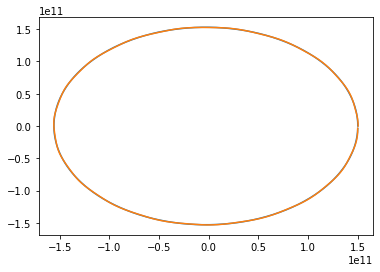

In [428]:
plt.plot(x_earth,y_earth) #plotting the trajectories
plt.plot(x_moon,y_moon)

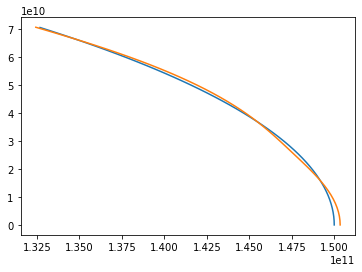

In [429]:
plt.plot(x_earth[0:50],y_earth[0:50]) #plotting first few days of the trejectories
plt.plot(x_moon[0:50],y_moon[0:50])

In [430]:
30/(1/(86400/(5*10**4))) #calcualting which index corresponds to one month

51.839999999999996

In [433]:
x_moon_rel = [] #calcualting the relative coordinates to check if moon really orbits around earth
y_moon_rel = []
for j in range(len(x_moon)):
    x_moon_rel.append( x_moon[j] - x_earth[j] )
    y_moon_rel.append( y_moon[j] - y_earth[j] )

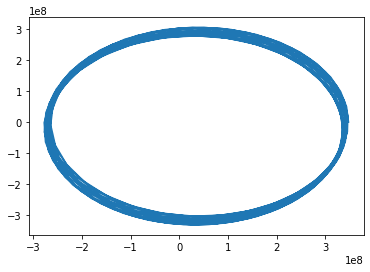

In [435]:
plt.plot(x_moon_rel,y_moon_rel) #plotting moons orbital

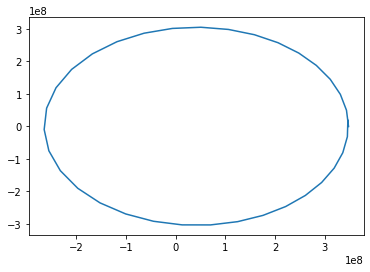

In [440]:
plt.plot(x_moon_rel[0:35],y_moon_rel[0:35]) #plotting moons orbital for first few days

In [441]:
print(x_moon_rel[0]/(0.00232*150e9)) #printing normalised initial positions for safety check
print(y_moon_rel[0]/(0.00232*150e9))

1.0
0.0


# Earth-Sun system

The 3 body problem was very hard to simulate so to test the idea presented above we reduced the number of interacting planets to 2 and we still considered motion in the x-y plane. We checked if we made a mistake in the code or our system was just too sensitive for the initial conditions. After playing with the initial conditions we could manage to simulate the 3 body sytem as well, but we leave this part here for completness. There are no comments for this part since everything is the same the time evolution is just simplified.

In [442]:
def two_body_interaction(m1,m2,x1,y1,x2,y2): #1-es test által a 2-es testre kifejtett erő
    distance = np.sqrt((x2-x1)**2+(y2-y1)**2)
    Fx = gamma*m1*m2*(x1-x2) / distance**3
    Fy = gamma*m1*m2*(y1-y2) / distance**3
    
    return Fx, Fy

In [443]:
def time_evolution_2body(x_earth,y_earth,x_sun,y_sun,v_x_earth,v_y_earth):
    F_net_earth_x =  -1 * two_body_interaction(m_earth,m_sun,x_earth,y_earth,x_sun,y_sun)[0]
    F_net_earth_y =  -1 * two_body_interaction(m_earth,m_sun,x_earth,y_earth,x_sun,y_sun)[1]
    
    x_earth1 = x_earth + dt * v_x_earth + 0.5 * dt * dt * F_net_earth_x / m_earth
    y_earth1 = y_earth + dt * v_y_earth + 0.5 * dt * dt * F_net_earth_y / m_earth
    
    
    F_net_earth_x1 =  -1* two_body_interaction(m_earth,m_sun,x_earth1,y_earth1,x_sun,y_sun)[0]
    F_net_earth_y1 =  -1* two_body_interaction(m_earth,m_sun,x_earth1,y_earth1,x_sun,y_sun)[1]
    
    v_x_earth1 = v_x_earth + 0.5 * dt * (F_net_earth_x+F_net_earth_x1) / m_earth
    v_y_earth1 = v_y_earth + 0.5 * dt * (F_net_earth_y+F_net_earth_y1) / m_earth
    
    
    return x_earth1,y_earth1, v_x_earth1, v_y_earth1

In [444]:
gamma = 6.67e-11
m_earth = 5.97e24
m_sun = 333000 * m_earth
x0_sun = 0
y0_sun = 0
x0_earth = 150e9
y0_earth = 0

v0x_earth = 0
v0y_earth = 30e3

dt = 5e4

In [445]:
x_earth = []
y_earth = []

v_x_earth = []
v_y_earth = []

x_earth.append(x0_earth)
y_earth.append(y0_earth)

v_x_earth.append(v0x_earth)
v_y_earth.append(v0y_earth)

x_sun = x0_sun
y_sun = y0_sun

In [446]:
for k in range(650):
    x_earth1,y_earth1, v_x_earth1, v_y_earth1 = time_evolution_2body(x_earth[k],y_earth[k],x_sun,y_sun,v_x_earth[k],v_y_earth[k])
    x_earth.append(x_earth1)
    y_earth.append(y_earth1)

    v_x_earth.append(v_x_earth1)
    v_y_earth.append(v_y_earth1)

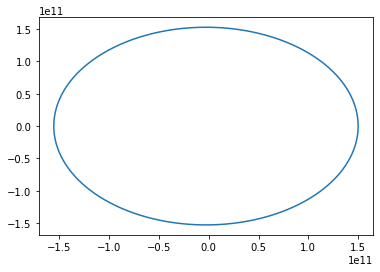

In [447]:
plt.plot(x_earth,y_earth)
plt.plot(x_sun,y_sun)

# How does the initial speed affect the orbital?

Try initial speed parallel with x axis. It should result in a straight line.

In [448]:
v0x_earth = 10e3
v0y_earth = 0
x0_earth = 150e9
y0_earth = 0


x_earth = []
y_earth = []

v_x_earth = []
v_y_earth = []

x_earth.append(x0_earth)
y_earth.append(y0_earth)

v_x_earth.append(v0x_earth)
v_y_earth.append(v0y_earth)

In [449]:
for k in range(650):
    x_earth1,y_earth1, v_x_earth1, v_y_earth1 = time_evolution_2body(x_earth[k],y_earth[k],x_sun,y_sun,v_x_earth[k],v_y_earth[k])
    x_earth.append(x_earth1)
    y_earth.append(y_earth1)

    v_x_earth.append(v_x_earth1)
    v_y_earth.append(v_y_earth1)

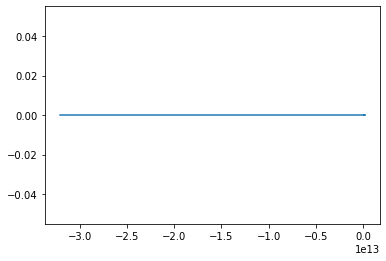

In [450]:
plt.plot(x_earth,y_earth)
plt.plot(x_sun,y_sun)

Initial speed for which the total energy is 0 should result in a parabola according to classical mechanics, so try spped for which the initial energy equals to zero. This can be achieved by setting $v_0=\sqrt{\frac{2M \gamma}{r_0}} \approx 4.2047 \times 10^{4} \frac{m}{s}$

In [451]:
v0x_earth = 0
v0y_earth = 4.2047e4
x0_earth = 150e9
y0_earth = 0


x_earth = []
y_earth = []

v_x_earth = []
v_y_earth = []

x_earth.append(x0_earth)
y_earth.append(y0_earth)

v_x_earth.append(v0x_earth)
v_y_earth.append(v0y_earth)

In [452]:
for k in range(65000):
    x_earth1,y_earth1, v_x_earth1, v_y_earth1 = time_evolution_2body(x_earth[k],y_earth[k],x_sun,y_sun,v_x_earth[k],v_y_earth[k])
    x_earth.append(x_earth1)
    y_earth.append(y_earth1)

    v_x_earth.append(v_x_earth1)
    v_y_earth.append(v_y_earth1)

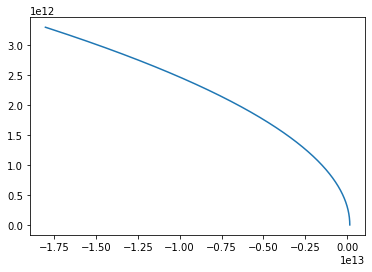

In [453]:
plt.plot(x_earth,y_earth)
plt.plot(x_sun,y_sun)

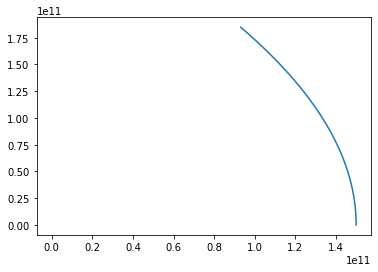

In [454]:
plt.plot(x_earth[0:100],y_earth[0:100])
plt.plot(x_sun,y_sun)

For initial speed corresponding to positive energy one should get a hiperbola.

In [455]:
v0x_earth = 0
v0y_earth = 10e4
x0_earth = 150e9
y0_earth = 0


x_earth = []
y_earth = []

v_x_earth = []
v_y_earth = []

x_earth.append(x0_earth)
y_earth.append(y0_earth)

v_x_earth.append(v0x_earth)
v_y_earth.append(v0y_earth)

In [456]:
for k in range(650):
    x_earth1,y_earth1, v_x_earth1, v_y_earth1 = time_evolution_2body(x_earth[k],y_earth[k],x_sun,y_sun,v_x_earth[k],v_y_earth[k])
    x_earth.append(x_earth1)
    y_earth.append(y_earth1)

    v_x_earth.append(v_x_earth1)
    v_y_earth.append(v_y_earth1)

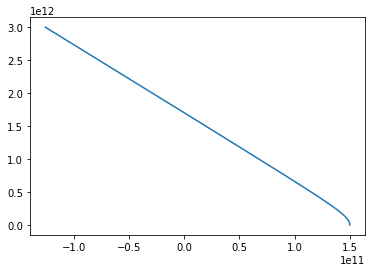

In [416]:
plt.plot(x_earth,y_earth)
plt.plot(x_sun,y_sun)